# **Modelling and Evaluation**

## **1. Introduction**

## Objectives

- **Answer business requirement 2**
    - The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## Inputs

- inputs/datasets/cherry-leaves/train
- inputs/datasets/cherry-leaves/validation
- inputs/datasets/cherry-leaves/test
- image_shape.pkl file
  
## Outputs

- Plot illustrating how images are distributed within the training, validation, and test sets.
- Image augmentation.
- Mapping class indices to labels for human-readable predictions.
- Creating and training a TensorFlow-based machine learning model.
- Save model.
- Graph displaying the learning curve for the model's performance.
- Model evaluation on pickle file.
- Making predictions on a randomly selected leaf image file.


---

## **2. Import packages**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## **3. Setup**

### Working Directory

We need to change the working directory to the projects main directory
* We access the current directory with os.getcwd()

In [2]:
cwd = os.getcwd()
print(f"\x1b[32mCurrent directory - {cwd}\x1b[0m")

Current directory - /workspaces/Portfolio-Project-5/jupyter_notebooks


In [3]:
os.chdir('/workspaces/Portfolio-Project-5')
print("\x1b[32mYou set a new current directory\x1b[0m")

You set a new current directory


In [4]:
work_dir = os.getcwd()
print(f"\x1b[32mCurrent directory - {cwd}\x1b[0m")

Current directory - /workspaces/Portfolio-Project-5/jupyter_notebooks


---

### Input Directories
- Setting the input directories 

In [5]:
my_data_dir = 'inputs/datasets/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

---

### Output Directories

- Setting the output directories

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


---

### Labels

- This cell will get the labels for the train dataset

In [7]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['powdery_mildew', 'healthy']


---

### Image Shape

- Import saved image shape embedding

In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(50, 50, 3)

---

## **4. Number Of Images**

- This function is designed to determine the quantity of images within each label category for the training, validation, and testing datasets.
- We perform this action to determine if there is an even distribution of data among the labels within the datasets.

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images




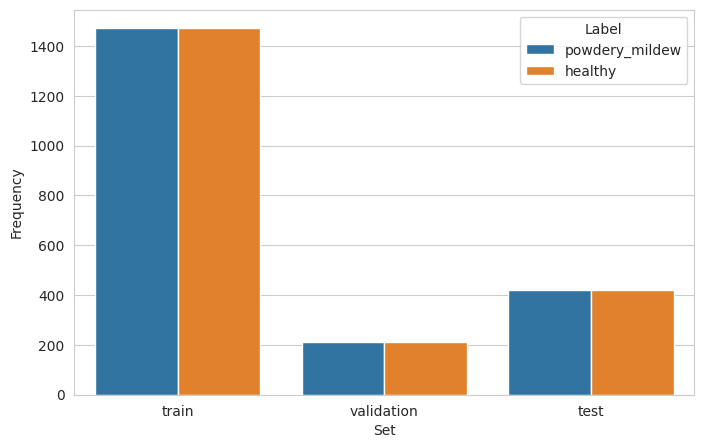

In [9]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

## **5. Data Augmentation**

### Setup

- Importing package and setting up ImageDataGenerator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

---

### Augment dataset

- Training

In [38]:
batch_size = 15 # Setting batch size of 10
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- Validation

In [39]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- Test

In [40]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

---

### Plot Augmented Dataset

- Training

(15, 50, 50, 3)


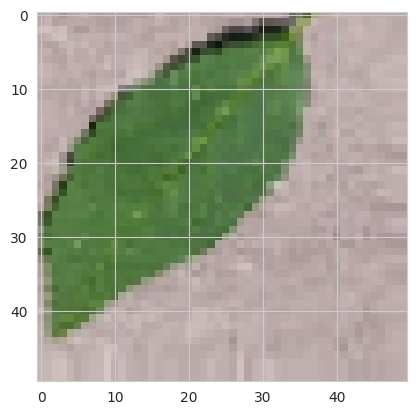

(15, 50, 50, 3)


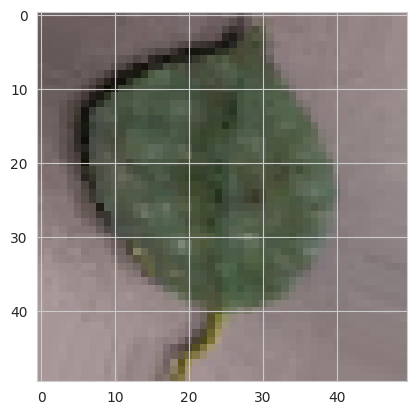

(15, 50, 50, 3)


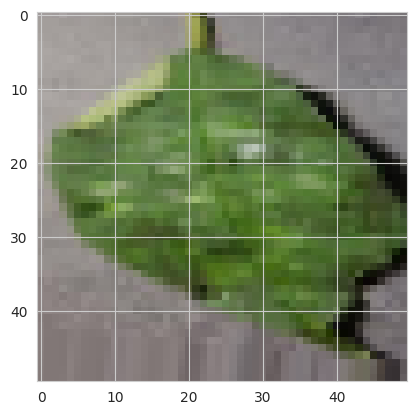

In [41]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

- Validation

(15, 50, 50, 3)


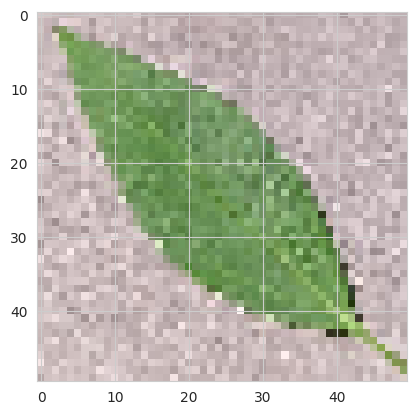

(15, 50, 50, 3)


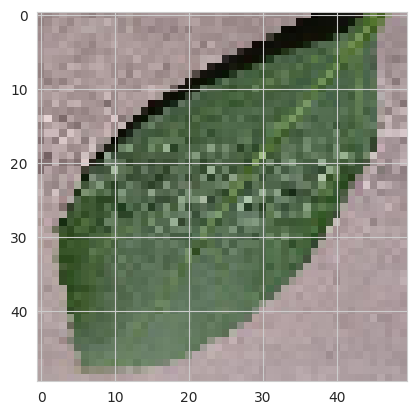

(15, 50, 50, 3)


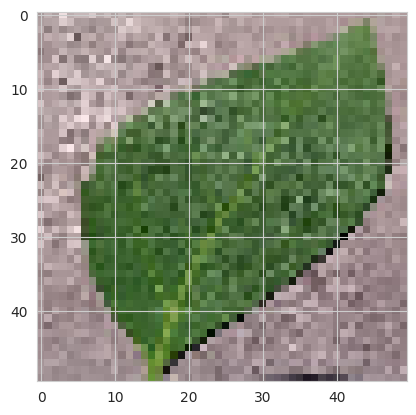

In [42]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

- Test

(15, 50, 50, 3)


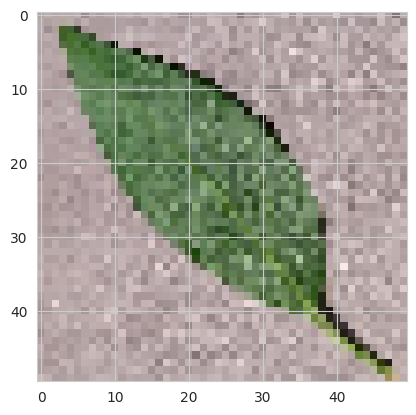

(15, 50, 50, 3)


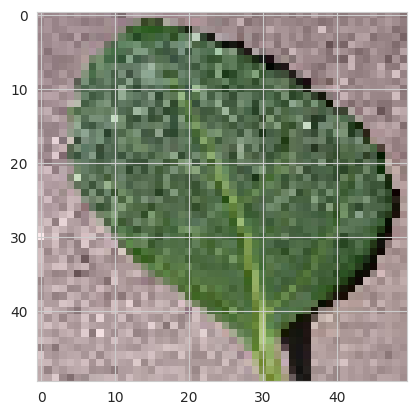

(15, 50, 50, 3)


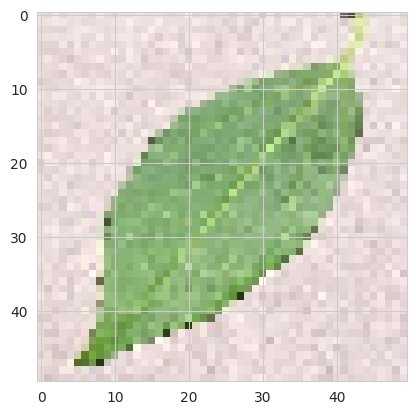

In [43]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

---

### Save class_indices

- This cell will save the indices for the labels to class_indices.pkl and print out the stored index value for each label

In [44]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

class_indices = joblib.load(f"{file_path}/class_indices.pkl")
print(class_indices)

{'healthy': 0, 'powdery_mildew': 1}


---

## **6. Model Creation**

### TensorFlow

- Importing TensorFlow

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Model

- Create the model

In [46]:
def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

- Model summary

In [47]:
create_tf_model().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

- Early stopping

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

- Fit the Model for training

In [49]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/25
196/196 [==============================] - 15s 69ms/step - loss: 0.3786 - accuracy: 0.8088 - val_loss: 0.1215 - val_accuracy: 0.9690
Epoch 2/25
196/196 [==============================] - 12s 61ms/step - loss: 0.1527 - accuracy: 0.9443 - val_loss: 0.0546 - val_accuracy: 0.9905
Epoch 3/25
196/196 [==============================] - 15s 74ms/step - loss: 0.1032 - accuracy: 0.9665 - val_loss: 0.0440 - val_accuracy: 0.9905
Epoch 4/25
196/196 [==============================] - 13s 69ms/step - loss: 0.0745 - accuracy: 0.9816 - val_loss: 0.0289 - val_accuracy: 0.9929
Epoch 5/25
196/196 [==============================] - 13s 65ms/step - loss: 0.0730 - accuracy: 0.9795 - val_loss: 0.0156 - val_accuracy: 0.9929
Epoch 6/25
196/196 [==============================] - 13s 64ms/step - loss: 0.0638 - accuracy: 0.9775 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 7/25
196/196 [==============================] - 12s 60ms/step - loss: 0.0397 - accuracy: 0.9894 - val_loss: 0.0109 - val_accuracy:

- Save the model

In [24]:
model.save('outputs/v1/cherry_leaves_model.h5')

## **7. Model Performace**

### Model learning curve

- This function will create plots of the models performance, the blue line is for training data and the orange is for validation data

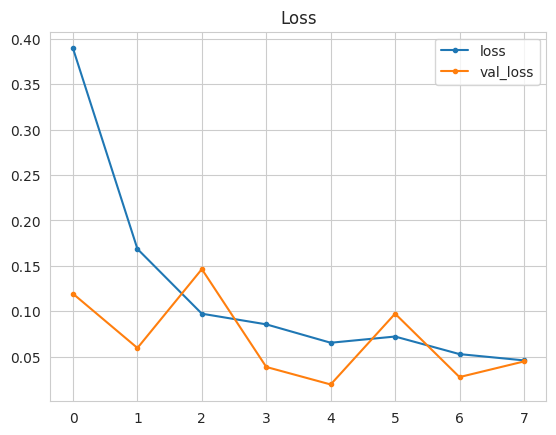

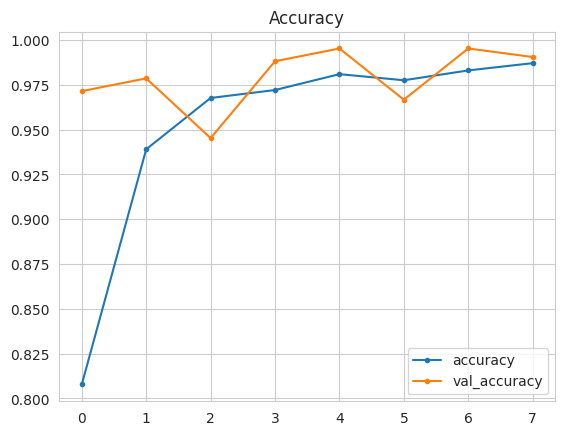

In [25]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)

plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)

plt.show()

---

### Model Evaluation

- We start by loading our model

In [26]:
from keras.models import load_model
model = load_model('outputs/v1/cherry_leaves_model.h5')

- Then we evaluate the model on the test set

In [27]:
evaluation = model.evaluate(test_set)

85/85 [==============================] - 2s 16ms/step - loss: 0.0610 - accuracy: 0.9775


- And last we store it to a pickle file

In [28]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

### Predict With Unseen Data

- We will load a random picture from the test set

Image shape: (50, 50), Image mode: RGB


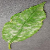

In [29]:
from tensorflow.keras.preprocessing import image

pointer = 85
label = labels[0]  # select Uninfected or Parasitised

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image


- Transform it into an array

In [30]:
prediction_test_image = image.img_to_array(pil_image)
prediction_test_image = np.expand_dims(prediction_test_image, axis=0)/255
print(prediction_test_image.shape)

(1, 50, 50, 3)


- Finally, we will predict the picture's class and display its associated probability.

In [31]:
pred_proba = model.predict(prediction_test_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.99760616
powdery_mildew


## **8. Push to Github Repository**

In [32]:
#!cat .gitignore

In [33]:
#!git status

In [34]:
#!git add .

In [35]:
#!git commit -am " Add 'Push to GitHub Repository' section in 04-Modelling_and_Evaluation.ipynb"

In [36]:
#!git push

## **9 .Conclusions and Next Steps**

- In this notebook, we successfully trained a TensorFlow Convolutional Neural Network (CNN) model to effectively distinguish between sick and healthy cherry leaves.

- Our model demonstrated remarkable performance, reaching an accuracy of 99% on the test set. This level of accuracy exceeds our initial expectations and fulfills the primary objective of the project.

- The next phase of our project involves integrating this trained model into a Streamlit dashboard, where it can be utilized by stakeholders. This interactive interface will provide a platform for real-time leaf disease classification.